# **Проект "Исследование продаж компьютерных игр для интернет-магазина "Стримчик"**

**Описание проекта:**

Проект предполагает изучение, анализ и проверку статистических гипотез на основе датасета по статистике проданных компьютерных игр по всему миру за период с 1980 по 2016 год, при этом, данные за 2016 год могут быть неполными.

**Цель проекта:**

Выявить закономерности, положительно влияющие на продажи той или иной категории компьютерных-игр, для дальнейшего возможного формирования рекомендаций по потенциально популярным в 2017 году компьютерным играм и, как следствие, выстраивания маркетинговых компаний интернет-магазина "Стримчик".

**Ход выполненеия проекта:**

Проект будет выполнен в 6 шагов:
- обзор датасета и определение необходимых шагов по предобработке данных;
- предобработка данных (исключение дублей, заполнение пропусков, там где это возможно и целесообразно, добавление необходимых полей в датасет);
- исследовательский анализ данных (изучение характеристик отдельных полей данных и формулировка предварительных выводов на их основе);
- формирование портрета пользователя по регионам;
- статистический анализ данных (формулирование и проверка статистических гипотез);
- общий вывод по проанализированным данным.

## Обзор датасета

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

In [ ]:
df=pd.read_csv('/datasets/games.csv')

In [ ]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Выводы по результатам обзора:**
- датасет содержит 16715 строк в 10 колонках, при этом, 7 колонок, преимущественно, не содержат пропусков, 3 колонки содержат пропуски в примерно в 56% случаев - необходимо будет принимать решения о возможности и целесообразности заполнения данных пропусков.
- наименования столбцов данных целесообразно привести к "змеиному" стилю.
- данные в столбце "Year_of_Release" целесообразно привести к типу int.
- данные в столбце "User_Score" целесообразно привести к типу float.


## Предобработка данных

### Проверка на наличие полных дубликатов

In [ ]:
df.duplicated().sum()

0

Датасет не содержит полных явных дубликатов строк.

### Преобразование наименований столбцов

Преобразуем названия столбцов датасета с использованием только букв нижнего регистра.

In [ ]:
df = df.rename(str.lower, axis='columns')

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Изменение типов данных в столбцах, заполнение пропусков

In [ ]:
# год выхода игры содержит только 1.6% пропусков, поэтому замена этих пропусков на 0 несущественно повлияет
# на статистические характики данных
# преобразуем тип данных года выхода игры к целочисленному типу

# учитывая, что для целей проекта знание о годе выхода релиза имеет критическое значение, то строки, где этот
# параметр пропущен необходимо исключить.

df['year_of_release']=df['year_of_release'].fillna(0).astype(int)
df=df[df['year_of_release']!=0]

In [ ]:
#исключим из датасета строки для которых в столбце name - пропуски. таких строк всего 2.
df = df[df['name'].isna()==False]

In [ ]:
# изучим последовательно значения во всех столбцах для определения наличия нетипичных значений

df.value_counts(subset='platform')

platform
PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
dtype: int64

In [ ]:
df.value_counts(subset='year_of_release')

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
dtype: int64

In [ ]:
df.value_counts(subset='genre')

genre
Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
dtype: int64

Данные в столбцах 'platform', year_of_release', 'genre' не нуждаются в дальнейшей коррекции.

In [ ]:
df.value_counts(subset='user_score')

user_score
tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.5       2
1.9       2
0.2       2
9.7       1
0         1
Length: 96, dtype: int64

Самым частым значением является "tbd". Оно встречается 2 369 раз или более 14%. Очень много.
TBD - аббевиатура, расшифовываемая как "to be determined" - "подлежит уточнению", а значит эти данные можно заменить на NaN. После чего можно заменить тип данныз в столбце на float.

In [ ]:
df.loc[df['user_score']=='tbd', 'user_score'] = np.nan
df['user_score'] = df['user_score'].astype(float)

In [ ]:
df.value_counts(subset='rating')

rating
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
dtype: int64

Изучим значения рейтинга. Из задания к исследованию известно, что рейтинг является рейтингом ESRB.

Значения данного рейтинга, согласно данным Википедия:

«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Первоначально "K-A" ("Kids to Adults").

«T» («Teen») — «Подросткам

«M» («Mature») — «Для взрослых»

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«EC» («Early childhood») — «Для детей младшего возраста»

«AO» («Adults Only 18+») — «Только для взрослых

«RP» («Rating Pending») — «Рейтинг ожидается.

Таким образом, значения рейтинга "К-А" переименуем в "Е", а "АО" в "М".
А строки с рейтингами "ЕС", "АО", "RP" - удалим, как не влияющие на качество данных в виду их незначительного количества.

В отношении пропусков, которых в данном столбце более 40%,можно попробовать заполнить рейтингами по совпадающему названию игры,
в предположении, что для одной и той же игры, вне зависимости от года выхода и платформы рейтинг будет одним и тем же.

In [ ]:
nan_rating_games = list(df.loc[df['rating'].isna()]['name'].unique())
game_rating = df.filter(['name', 'rating']).query('name in @nan_rating_games')\
.dropna(subset=['rating']).drop_duplicates(subset='name').reset_index(drop=True)
game_rating

,name,rating
0,Call of Duty: Ghosts,M
1,The Elder Scrolls V: Skyrim,M
2,Need for Speed Underground 2,E
3,FIFA 14,E
4,Donkey Kong Country Returns,E
...,...,...
341,Puyo Pop Fever,E
342,The Book of Unwritten Tales 2,T
343,Satisfashion,E
344,Banjo-Kazooie,E


Преобразуем каждый столбец в список:

In [ ]:
name = game_rating['name'].tolist()
rating = game_rating['rating'].tolist()

Заполним пропуски в датасете:

In [ ]:
for i in range(len(name)):
        df.loc[(df['rating'].isna()==True) & (df['name'] == name[i]), 'rating' ] = rating[i]

In [ ]:
# в виду незначительного количества строк с рейтингами "ЕС" и "RP" иcключим эти строки из датасета.
df['rating'] = df['rating'].replace({'K-A':'E','AO':'M'})

df = df[(df['rating']!='EC')&(df['rating']!='RP')]

df['rating']= df['rating'].fillna('N/A')


df.value_counts(subset='rating')

rating
N/A     6259
E       4079
T       3032
M       1622
E10+    1441
dtype: int64

Ввиду большого количества пропусков в данном столбце, устаноить обоснованную замену пропускам не представляется возможным, поэтому оставляем данные в скорректированном виде, а пропуски заменим текстовым значением "N/A".

### Добавление необходимых столбцов

Добавляем стобец суммарных продаж во всех регионах

In [ ]:
df['world_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

### Итоги предобработки данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16433 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16433 non-null  object 
 1   platform         16433 non-null  object 
 2   year_of_release  16433 non-null  int64  
 3   genre            16433 non-null  object 
 4   na_sales         16433 non-null  float64
 5   eu_sales         16433 non-null  float64
 6   jp_sales         16433 non-null  float64
 7   other_sales      16433 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7461 non-null   float64
 10  rating           16433 non-null  object 
 11  world_sales      16433 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,N/A,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,N/A,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,N/A,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,N/A,28.31


**Итоги предобработки данных:**

В результате предобработки данных пришлось удалить 282 строки данных, что составлет менее 1.69% от всего объема датасета,
прежде всего это строки с отсутсвующим годом выхода игры, т.к. без года выхода рассматривать остальные данные не имеет смысла.

Названия столбцов приведены к "змеиному" регистру, а типы данных в столбцах приведены в соответсвие с самими данными (в т.ч. год
выхода игры - int, user_score - float.

Добавлен дополнительный столбец, в который суммированы продажи по всем регионам.

Незначительно удалось заполнить пропуски в данных в столбце rating. В столбцах user_score и critic_score пропуски оставлены без
изменений, т.к. обоснованный алгоритм замены пропусков определить не представлется возможным.

## Исследовательский анализ данных

### Релизы игр по годам

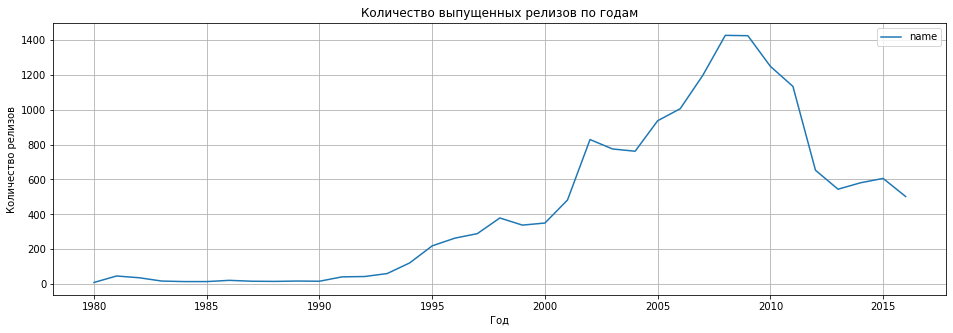

In [ ]:
# сформируем сводную таблицу количества релизов по годам
games_per_year = df.pivot_table(index='year_of_release', values='name', aggfunc=['count']).reset_index()

#выведем график количества релизов по годам
games_per_year.plot.line(x='year_of_release', y='count',grid=True, figsize=(16,5),
                         title='Количество выпущенных релизов по годам', xlabel = 'Год', ylabel='Количество релизов');


Из графика видно, что до 1990 года выпускалось крайне мало релизов.
С 1990 по 2008 год наблюдался постоянный рост количества релизов по годам.
С 2009 по 2013 наблюдался резкий спад количества релизов по годам.
В 2015 году наметился "перелом" в падении, но судить об этом точно нельзя ввиду, возможно, неполных данных за 2016 год.
Для дальнейшего рассмотрения целесообразно рассматривать только период, как минимум с 2005 по 2016 года.

### Продажи по платформам

In [ ]:
platform_per_year = df.pivot_table(index='year_of_release',columns='platform',values='world_sales', aggfunc=['sum'])\
                                   .droplevel(0, axis=1)
platform_per_year.tail(10)

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
2007,NaN,NaN,NaN,0.02,146.94,NaN,3.4,0.27,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,152.77,NaN,95.41,0.55,NaN
2008,NaN,NaN,NaN,0.04,145.31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,171.32,NaN,135.26,0.18,NaN
2009,NaN,NaN,NaN,NaN,119.34,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,206.97,NaN,120.29,NaN,NaN
2010,NaN,NaN,NaN,NaN,84.47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,127.29,NaN,170.03,NaN,NaN
2011,NaN,NaN,63.20,NaN,25.73,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.65,NaN,143.84,NaN,NaN
2012,NaN,NaN,51.36,NaN,11.01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21.71,17.56,99.74,NaN,NaN
2013,NaN,NaN,56.57,NaN,1.54,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.59,21.65,88.58,NaN,18.96
2014,NaN,NaN,43.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.75,22.03,34.74,NaN,54.07
2015,NaN,NaN,27.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.14,16.35,11.96,NaN,60.14


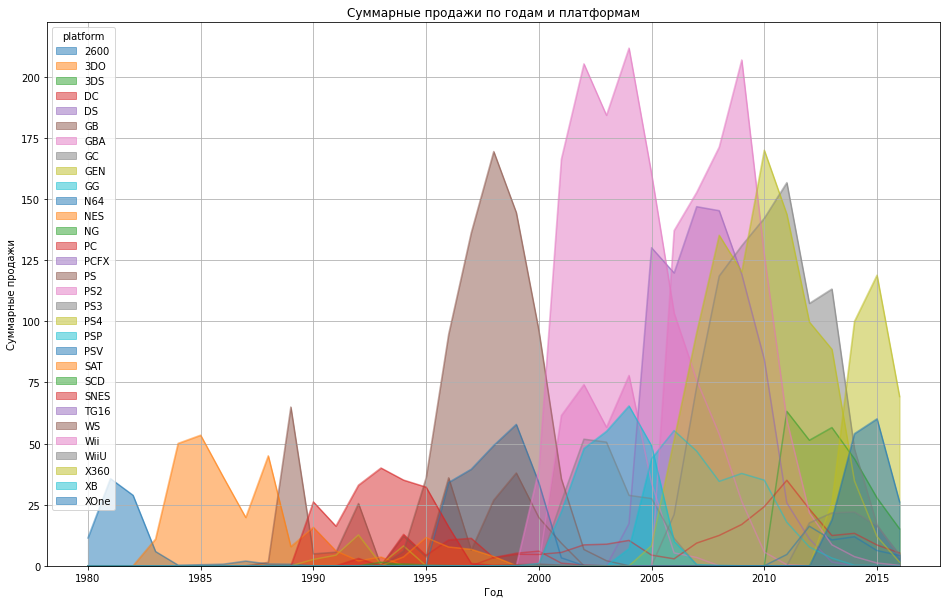

In [ ]:
platform_per_year.plot.area(grid=True, figsize=(16,10), stacked=False,
                            title='Суммарные продажи по годам и платформам',
                            xlabel = 'Год', ylabel='Суммарные продажи');


Хоть график и не очень показательный ввиду наличия большого количества платформ, однако на мнем можно увидеть как лидеров продаж (платформы с макмисальным количеством релизов), так и "жизненный цикл" платформы (периоды появления, роста, падения и закрытия платформ).

In [ ]:
platform_total_sum = df.pivot_table(index='platform',values='world_sales', aggfunc=['sum']).droplevel(1, axis=1)
platform_total_sum.sort_values(by='sum', ascending=False).head(5)

,sum
platform,
PS2,1233.32
X360,961.24
PS3,931.34
Wii,890.52
DS,801.58


Получили перечень платформ (первые 5) с наибольшими суммарными продажами.
Преобразуем этот перечень в список.

In [ ]:
platform_total_sum_list = platform_total_sum.sort_values(by='sum', ascending=False).head(5).index.tolist()
platform_total_sum_list

['PS2', 'X360', 'PS3', 'Wii', 'DS']

Построим распределение по годам продаж по данным платформам.

In [ ]:
platform_total_sum_top = df.query('platform in @platform_total_sum_list')
pt_platform_total_sum_top = platform_total_sum_top.pivot_table(index='year_of_release',columns='platform',
                                                            values='world_sales', aggfunc=['sum'])\
                                   .droplevel(0, axis=1)

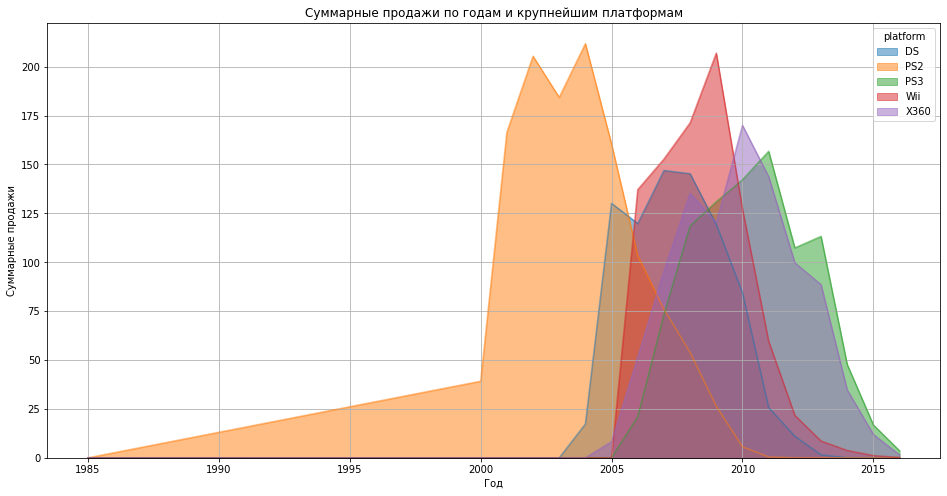

In [ ]:
pt_platform_total_sum_top.plot.area(grid=True, figsize=(16,8), stacked=False,
                            title='Суммарные продажи по годам и крупнейшим платформам',
                            xlabel = 'Год', ylabel='Суммарные продажи');

Вызывает большие сомнения "начало жизненного цикла" для платформы DS = 1985 год. Вероятно, в данных есть ошибочные строки. Необходимо их определеить и исключить.

In [ ]:
platform_total_sum_top.query('platform == "DS"')['year_of_release'].sort_values()

15957    1985
691      2004
6578     2004
6063     2004
8984     2004
         ... 
7460     2013
14716    2013
11973    2013
5054     2013
7993     2013
Name: year_of_release, Length: 2117, dtype: int64

In [ ]:
platform_total_sum_top = platform_total_sum_top.drop(axis=0, index=15957)

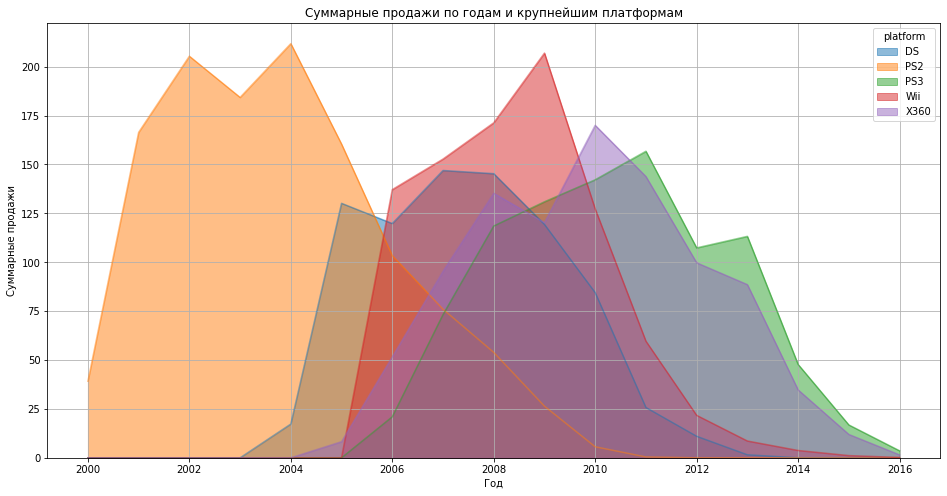

In [ ]:
pt_platform_total_sum_top = platform_total_sum_top.pivot_table(index='year_of_release',columns='platform',
                                                            values='world_sales', aggfunc=['sum'])\
                                   .droplevel(0, axis=1)

pt_platform_total_sum_top.plot.area(grid=True, figsize=(16,8), stacked=False,
                            title='Суммарные продажи по годам и крупнейшим платформам',
                            xlabel = 'Год', ylabel='Суммарные продажи');

По графикам можно определить примерный "жизненный цикл" платформ продолжительностью 10 лет.
Проверим это наблюдение на числовых показателях (среднее и медианное значения).

In [ ]:
platform_total_sum_top_life_time = (platform_total_sum_top.groupby('platform')['year_of_release'].max() -
                 platform_total_sum_top.groupby('platform')['year_of_release'].min())
print('Средняя продолжительность "жизненного цикла платформ" '+str(platform_total_sum_top_life_time.mean())+' лет')
print('Медианная продолжительность "жизненного цикла платформ" '+str(platform_total_sum_top_life_time.median())+' лет')

Средняя продолжительность "жизненного цикла платформ" 10.2 лет
Медианная продолжительность "жизненного цикла платформ" 10.0 лет


Расчетные показатели совпали с оценеными по графикам.

Принимая во внимание продолжительность "жизненного цикла" платформ и необходимость формирование прогнозов на 2017 год, опрелелим актуальный период данных: с 2008 года. Тогда платформы, существовавшие с этого периода продолжат существование и в 2017 году.
Сформируем датасет с актуальным периодом данных.

In [ ]:
df=df.query('year_of_release > 2012')

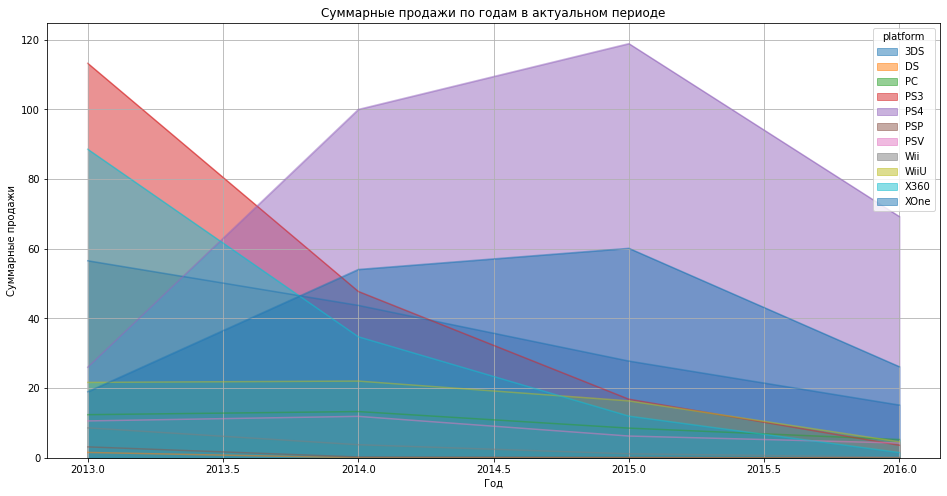

In [ ]:
pt_df = df.pivot_table(index='year_of_release',columns='platform',
                                                            values='world_sales', aggfunc=['sum'])\
                                   .droplevel(0, axis=1)

pt_df.plot.area(grid=True, figsize=(16,8), stacked=False,
                            title='Суммарные продажи по годам в актуальном периоде',
                            xlabel = 'Год', ylabel='Суммарные продажи');

На рассматриваемом актуальном периоде подавляющее большинство платформ демонстрируют отрицательную динамику продаж. Лидерами, как по суммарным продажам, так и по положительной динамике прождаж можно считать только две платформы: **PS4** и, с существенным отрывом - **XOne**. В тройку лидеров по продажам также входит платформа **3DS**, которая, правда, характеризуется отрицательной динамикой продаж, начиная с 2013 года.

Построим графики "ящик с усами" по мировым продажам игр в разбивке по платформам.

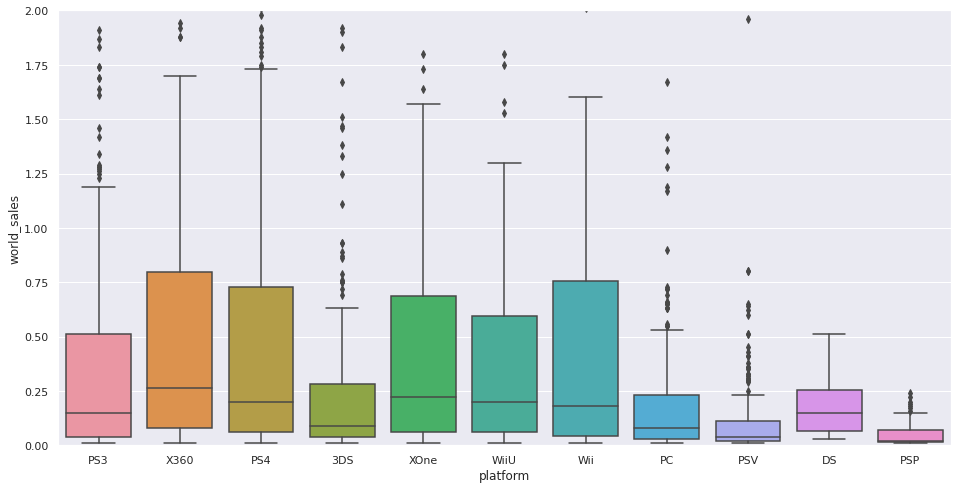

In [ ]:
sns.set(rc={'figure.figsize':(16,8)})
plt.ylim(0, 2)
sns.boxplot(x= df['platform'], y= df['world_sales']);

Графики дают альтернативную иллюстрацию нестабильности продаж, которую мы уже наблюдали выше. Большие размеры "ящиков", а также наличие "усов" у большинства платформ с большим объемов выбросов (даже при установленном лимите в 2 млн. на графике) еще раз подтверждают нестабильность во времени, в т.ч. на исследуемом промежуке времени, сумм продаж по большинству из платформ.

### Влияние отзывов пользователей и критиков на продажи

Проведем анализ влияния на продажи отзывов пользователей и критиков по выбранным платформам-лидерам.

In [ ]:
df_ps4= df.query('platform == "PS4"').filter(['world_sales', 'critic_score', 'user_score'])
df_ps4.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


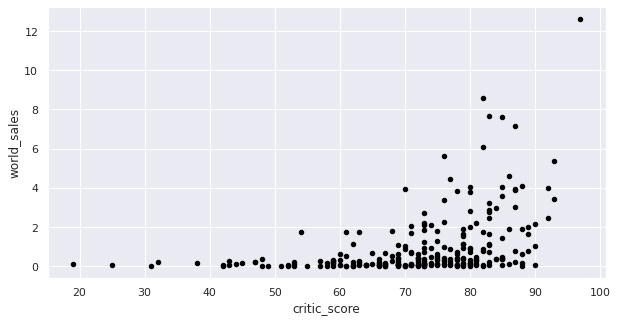

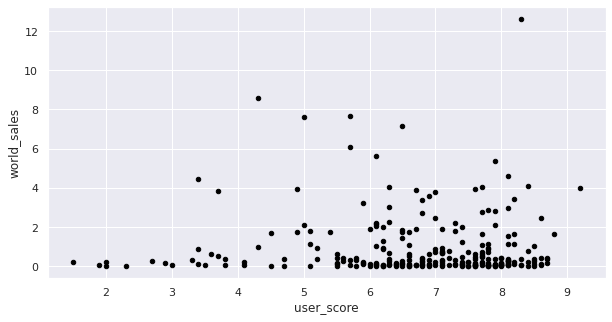

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
df_ps4.plot.scatter(y='world_sales', x='critic_score',c='Black');
df_ps4.plot.scatter(y='world_sales', x='user_score', c='Black');

Продажи для платформы PS4 имеют слабую зависимость от оценок критиков и практически никак не зависят от отзывов пользователей.

In [ ]:
df_xone= df.query('platform == "XOne"').filter(['world_sales', 'critic_score', 'user_score'])
df_xone.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


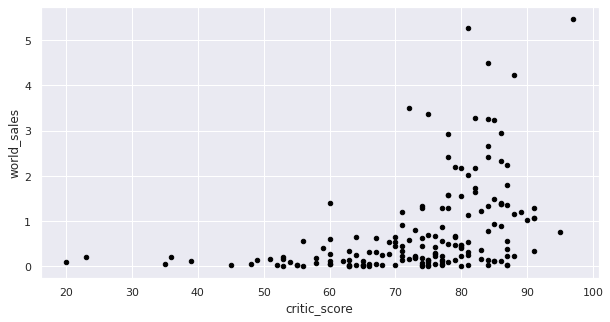

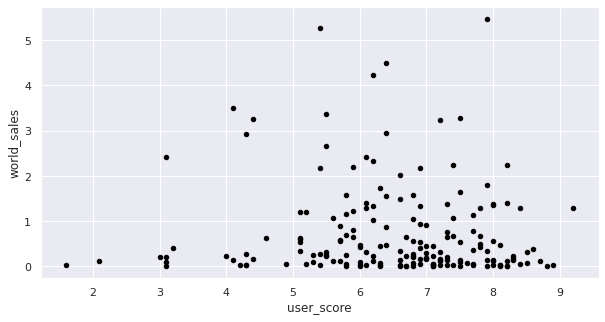

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
df_xone.plot.scatter(y='world_sales', x='critic_score', c='Black');
df_xone.plot.scatter(y='world_sales', x='user_score', c='Black');

Продажи для платформы XOne имеют слабую зависимость от оценок критиков и практически никак не зависят от отзывов пользователей.

In [ ]:
df_3ds= df.query('platform == "3DS"').filter(['world_sales', 'critic_score', 'user_score'])
df_3ds.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


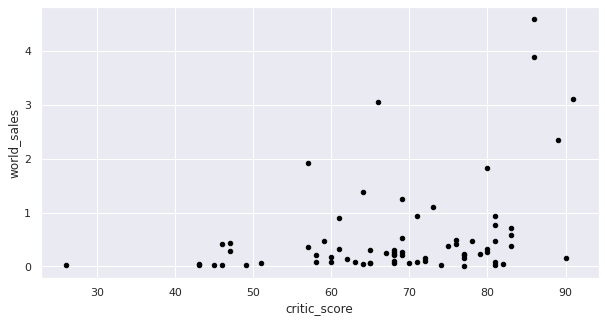

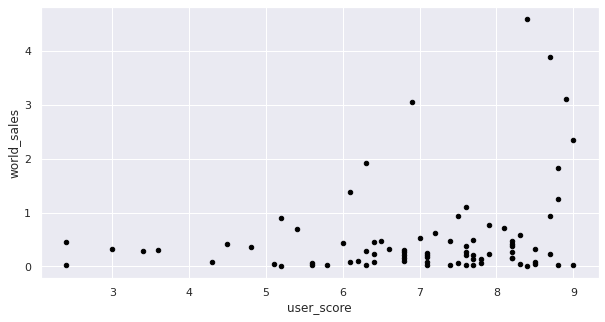

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
df_3ds.plot.scatter(y='world_sales', x='critic_score', c='Black');
df_3ds.plot.scatter(y='world_sales', x='user_score', c='Black');

Продажи для платформы 3DS имеют слабую зависимость от оценок критиков и от отзывов пользователей.

**Вывод по данному пункту**:

Продажи практически не зависят ни от отзывов пользователей, ни от оценок критиков.

### Влияние жанра игры на продажи

Распределение игр по жанрам:

In [ ]:
df.groupby('genre').count()['name'].sort_values(ascending=False)

genre
Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: name, dtype: int64

Большинство игр выпускаются в жанре Экшн. Далее следуют Misc, Sports и Adventure

In [ ]:
df.groupby('genre')['world_sales'].mean().sort_values(ascending=False)

genre
Shooter         1.245882
Sports          0.703972
Platform        0.576081
Role-Playing    0.499623
Racing          0.469294
Fighting        0.441375
Action          0.420196
Misc            0.405290
Simulation      0.350968
Puzzle          0.186471
Strategy        0.180000
Adventure       0.096490
Name: world_sales, dtype: float64

In [ ]:
df.groupby('genre')['world_sales'].median().sort_values(ascending=False)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,N/A,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,N/A,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,N/A,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,N/A,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,N/A,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,N/A,0.01


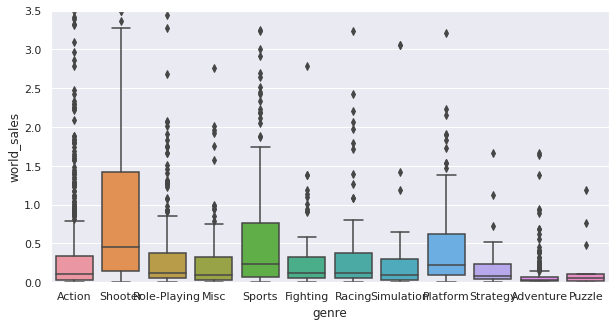

In [ ]:
plt.ylim(0, 3.5)
sns.boxplot(x= df['genre'], y= df['world_sales']);

Средние и медианные оценки мировых продаж по платформам совпадают и позволяют выделить наиболее прибыльные жанры: Shooter, Sports и Platform. При этом, Shooter по медианной оценке практически в 2 раза опережает ближайшего конкурента (Sports). Продажи жанров Puzzle, Strategy и Adventure ниже лидеров в разы, а иногда и на порядок.

## Формирование портрета пользователя по регионам

### Наиболее популярные платформы

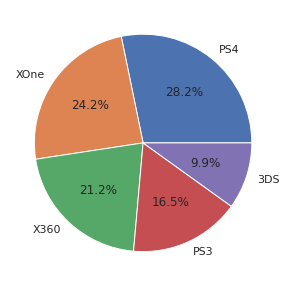

In [ ]:
# Для региона NA

pt_na_sales=df.pivot_table(index='platform',values='na_sales',aggfunc=['sum']
    ).droplevel(1, axis=1).sort_values(by='sum', ascending=False).head().reset_index()

plt.pie(pt_na_sales['sum'], labels = pt_na_sales['platform'],  autopct='%.1f%%', radius=1.0);

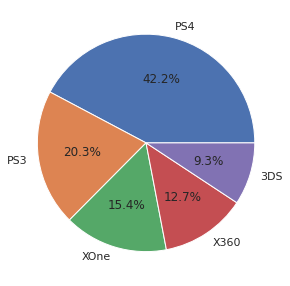

In [ ]:
# Для региона EU

pt_eu_sales=df.pivot_table(index='platform',values='eu_sales',aggfunc=['sum']
    ).droplevel(1, axis=1).sort_values(by='sum', ascending=False).head().reset_index()

plt.pie(pt_eu_sales['sum'], labels = pt_eu_sales['platform'],  autopct='%.1f%%', radius=1.0);

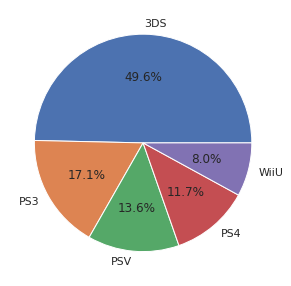

In [ ]:
# Для региона JP

pt_jp_sales=df.pivot_table(index='platform',values='jp_sales',aggfunc=['sum']
    ).droplevel(1, axis=1).sort_values(by='sum', ascending=False).head().reset_index()

plt.pie(pt_jp_sales['sum'], labels = pt_jp_sales['platform'],  autopct='%.1f%%', radius=1.0);

В Северной Америке самая популярная платформа PS4, с небольшим отрывом от нее идет XOne, за ним X360, в Европе - PS4, PS3 и XOne а в Японии - 3DS, PS3 и PSV

### Наиболее популярные жанры

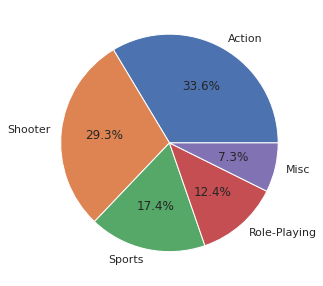

In [ ]:
# Для региона NA

pt_na_sales=df.pivot_table(index='genre',values='na_sales',aggfunc=['sum']
    ).droplevel(1, axis=1).sort_values(by='sum', ascending=False).head().reset_index()

plt.pie(pt_na_sales['sum'], labels = pt_na_sales['genre'],  autopct='%.1f%%', radius=1.0);

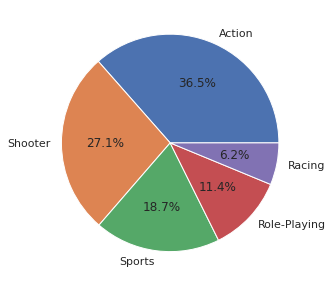

In [ ]:
# Для региона EU

pt_eu_sales=df.pivot_table(index='genre',values='eu_sales',aggfunc=['sum']
    ).droplevel(1, axis=1).sort_values(by='sum', ascending=False).head().reset_index()

plt.pie(pt_eu_sales['sum'], labels = pt_eu_sales['genre'],  autopct='%.1f%%', radius=1.0);

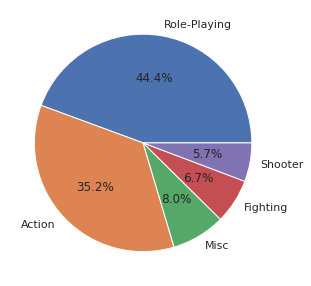

In [ ]:
# Для региона JP

pt_jp_sales=df.pivot_table(index='genre',values='jp_sales',aggfunc=['sum']
    ).droplevel(1, axis=1).sort_values(by='sum', ascending=False).head().reset_index()

plt.pie(pt_jp_sales['sum'], labels = pt_jp_sales['genre'],  autopct='%.1f%%', radius=1.0);

В Северной Америке и Европе самые популярные жанры - Action и Shooter, а в Японии - Role-Playing - безусловный лидер.

### Оценка влияния рейтинга на продажи в регионе

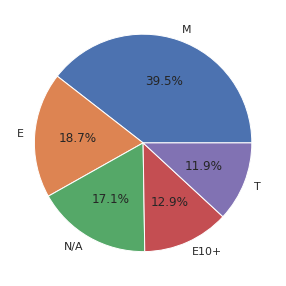

In [ ]:
# Для региона NA

pt_na_sales=df.pivot_table(index='rating',values='na_sales',aggfunc=['sum']
    ).droplevel(1, axis=1).sort_values(by='sum', ascending=False).head().reset_index()

plt.pie(pt_na_sales['sum'], labels = pt_na_sales['rating'],  autopct='%.1f%%', radius=1.0);

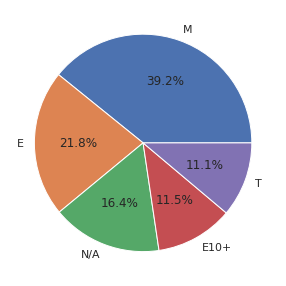

In [ ]:
# Для региона EU

pt_eu_sales=df.pivot_table(index='rating',values='eu_sales',aggfunc=['sum']
    ).droplevel(1, axis=1).sort_values(by='sum', ascending=False).head().reset_index()

plt.pie(pt_eu_sales['sum'], labels = pt_eu_sales['rating'],  autopct='%.1f%%', radius=1.0);

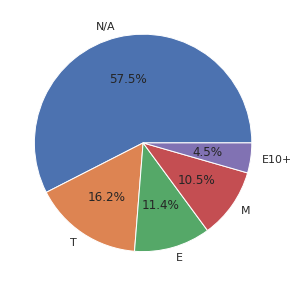

In [ ]:
# Для региона JP

pt_jp_sales=df.pivot_table(index='rating',values='jp_sales',aggfunc=['sum']
    ).droplevel(1, axis=1).sort_values(by='sum', ascending=False).head().reset_index()

plt.pie(pt_jp_sales['sum'], labels = pt_jp_sales['rating'],  autopct='%.1f%%', radius=1.0);

В Северной Америке и Европе - в лидерах рейтинги М и Е, а в Японии - рейтинг можно считать неопределенным, т.к. бОльшая часть игр не имеет рейтинга (рейтинг не установлен).

## Статистический анализ данных

### Проверка гипотезы о равенстве средних пользовательских рейтингов для платформ Xbox One и РС

Определим нулевую и альтернативную гипотезы:

H0 - средние пользовательские рейтинги платформ равны

H1 - средние пользовательские рейтинги платформ различаются

In [ ]:
xone_user_rating = df.query('platform == "XOne"')['user_score'].dropna()
pc_user_rating = df.query('platform == "PC"')['user_score'].dropna()

alpha = 0.05

results = st.ttest_ind(xone_user_rating, pc_user_rating)

if results.pvalue < alpha:
    print("Значение p-value =", str(results.pvalue.round(4)),
          ", что меньше порогового значения, следовательно - Отвергаем нулевую гипотезу.")
else:
    print("Значение p-value =", str(results.pvalue.round(4)),
          ", что больше порогового значения, следовательно - Нулевая гипотеза не может быть отвергнута.")

Значение p-value = 0.1401 , что больше порогового значения, следовательно - Нулевая гипотеза не может быть отвергнута.


По результатам статистического теста гипотеза о равенстве средних пользовательских рейтингов для платформ Xbox One и PC не может быть отвергнута, значит для данных платформ средние пользовательские рейтинги могут совпадать.

Рассчитаем эти рейтинги в явном виде:

In [ ]:
xone_user_rating.mean().round(4)

6.5214

In [ ]:
pc_user_rating.mean().round(4)

6.2697

Средние рейтинги действительно очень похожи.

### Проверка гипотезы о неравенстве средних пользовательских рейтингов жанров Action и Sports

Определим нулевую и альтернативную гипотезы:

H0 - средние пользовательские рейтинги жанров равны

H1 - средние пользовательские рейтинги жанров различаются

In [ ]:
action_user_rating = df.query('genre == "Action"')['user_score'].dropna()
sports_user_rating = df.query('genre == "Sports"')['user_score'].dropna()

alpha = 0.05

results = st.ttest_ind(action_user_rating, sports_user_rating)

if results.pvalue < alpha:
    print("Значение p-value =", str(results.pvalue),
          ", что меньше порогового значения, следовательно - Отвергаем нулевую гипотезу.")
else:
    print("Значение p-value =", str(results.pvalue),
          ", что больше порогового значения, следовательно - Нулевая гипотеза не может быть отвергнута.")

Значение p-value = 1.0517832389140023e-27 , что меньше порогового значения, следовательно - Отвергаем нулевую гипотезу.


По результатам статистического теста гипотеза о равенстве средних пользовательских рейтингов для жанров Action и Sports должна быть отвергнута, значит для данных жанров средние пользовательские рейтинги отличаются.

Рассчитаем эти рейтинги в явном виде:

In [ ]:
action_user_rating.mean().round(4)

6.8375

In [ ]:
sports_user_rating.mean().round(4)

5.2381

Средние рейтинги действительно отличаются.

## Общий вывод по проекту

В ходе выполнения исследования был изучен датасет о продажах компьютерных игр в мире за период 1980 - 2016 гг.

Объем датасета: 16 715 строк и 10 столбцов.

Проведена предобработка данных с изменением типов столбцов, устранением пропусков для тех данных, где такое устранение не влияет на статистические характеристики, удалением части строк из датасета, в виду наличия критических пропусков, не позволяющих провести анализ. Объем исключения данных составил 1.6% строк исходного датасета, что также не должно оказать влияния на аналитические выводы. Добавлен столбец "Сумма продаж в целом в мире".

Проведен исследовательский анализ данных, в результате которого определен "жизненный цикл платформы" равный 10 лет. Произведена фильтрация данных датасета по критерию: "год релиза больше 2012" для оставления в датасете информации, которая актуальна и для прогнозов на 2017 год.

Определены 3 платформы - лидеры по продажам, две из которых **PS4** и **Xbox One** характеризуются положительной динамикой продаж в последние годы, и одна - **3DS** - с отрицательной динамикой продаж.

Проведен анализ влияния на продажи пользовательских рейтингов и оценок критиков. Установлено, что продажи довольно слабо зависят от оценок критиков и практически не зависят от оценок пользователей.

Определены наиболее популярные платформы по регионам продаж (Северная Америка, Еврома, Япония). Для Северной Америки и Европы в лидерах платформа **PS4**, а для Японии - **3DS**.

Определены наиболее популярные жанры по регионам продаж (Северная Америка, Еврома, Япония). Для всех трех регионов в тройку лидеров вошел жанр **Action**, являющийся лидером по продаждам в Европе и Северной Америке. При этом, для Японии, безусловным лидером оказался **Role-Playing**.

Проведен статистический анализ данных, по результатам которого установлено, что средние пользовательские рейтинги платформ Xbox One и PC примерно равны. А средние пользовательские рейтинги жанров Action и Sports отличаются. При этом, средний рейтинг Action - выше.